In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pybaseball import batting_stats
from pybaseball import team_batting, statcast
from pybaseball import statcast_batter
from pybaseball import team_game_logs
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.width = 0
pd.options.display.max_colwidth = 100
import warnings
warnings.filterwarnings(action='ignore')

In [8]:
df = statcast('2024-01-01', '2024-12-31')

This is a large query, it may take a moment to complete
Skipping offseason dates
Skipping offseason dates


100%|██████████| 246/246 [08:05<00:00,  1.97s/it]


In [13]:
col_df = df[(df.home_team == 'COL') & (df['description'] == 'hit_into_play') & (df['estimated_woba_using_speedangle'] != '<NA>')]
#col_df.head()
print(col_df['estimated_woba_using_speedangle'].mean())
print(col_df['woba_value'].mean())

0.37455481498506094
0.4173753160193059


In [10]:
in_play_df = df[(df['home_team'] != 'COL') & (df['description'] == 'hit_into_play') & (df['estimated_woba_using_speedangle'] != '<NA>')]
print(in_play_df['estimated_woba_using_speedangle'].mean())
print(in_play_df['woba_value'].mean())

0.3659088763256716
0.37357900383774195


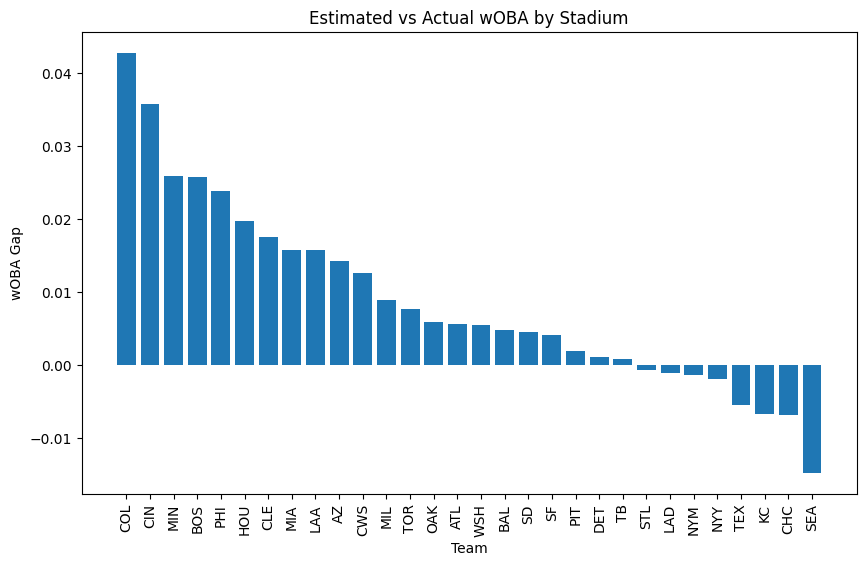

In [24]:
total_in_play_df = df[(df['description'] == 'hit_into_play') & (df['estimated_woba_using_speedangle'] != '<NA>')]
total_in_play_df['wOBA Gap'] = total_in_play_df['woba_value'] - total_in_play_df['estimated_woba_using_speedangle']
team_gaps = total_in_play_df.groupby('home_team')['wOBA Gap'].mean()
team_gaps = team_gaps.sort_values(ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(team_gaps.index, team_gaps.values)
plt.title('Estimated vs Actual wOBA by Stadium')
plt.xlabel('Team')
plt.ylabel('wOBA Gap')
plt.xticks(rotation=90)
plt.show()